# DSI 18 - Capstone Project

# Households Electricity Consumption Prediction 2021

## Contents

- [1. Objective](#1.-Objective)
    - [1.1. Problem Statement](#1.1.-Problem-Statement)
    - [1.2. Data Sources](#1.2.-Data-Sources)
- [2. Check the data given](#2.-Check-the-data-given)
    - [2.1. Definition of sunshine hours](#2.1.-Definition-of-sunshine-hours)
- [3. Clean the data](#3.-Clean-the-data)
    - [3.1. Clean the data](#3.1.-Clean-the-data)
    - [3.2. Combine the data](#3.2.-Combine-the-data)
- [4. EDA](#4.-EDA)
    - [4.1. Correlation of sunshine](#4.1.-Correlation-of-sunshine)
    - [4.2. Analyze different type of properties](#4.2.-Analyze-different-type-of-properties)
    - [4.3. Analyze changes in mean sunshine hours for different years](#4.3.-Analyze-changes-in-mean-sunshine-hours-for-different-years)
- [5. Autocorrelation](#5.-Autocorrelation)
- [6. Difference the data](#6.-Difference-the-data)
- [7. Apply Dickey Fuller test for original/differenced data](#7.-Apply-Dickey-Fuller-test-for-original/differenced-data)
- [8. Train/test split for original/differenced data](#8.-Train/test-split-for-original/differenced-data)
- [9. Plotting ACF and PACF](#9.-Plotting-ACF-and-PACF)
- [10. Modeling](#10.-Modeling)
    - [10.1. Modeling for private apartments and condo data](#10.1.-Modeling-for-private-apartments-and-condo-data)
    - [10.2. Modeling for landed properties data](#10.2.-Modeling-for-landed-properties-data)
- [11. Conclusion](#11.-Conclusion)
- [12. References](#12.-References)

## 1. Objective
[top](#Contents)

###### Based on the households electricity consumption in Singapore in 2005 - 2020, we are going to predict the households electricity consumption in Singapore for 2021.

### 1.1. Problem Statement
[top](#Contents)

As a data scientist engaged by Singapore Poower, i am going to analyze the trend of household electricity consumption in Singapore.

Based on the data from 2005 to 2020, i am going to predict the household electricity consumption for 2021.

### 1.2. Data Sources
[top](#Contents)

Past year Energy Consumption in Singapore from 2005 to 2020:

https://www.kaggle.com/zyc191/energy-consumption-singapore-from-opendata

## 2. Check the data given
[top](#Contents)

**2 set** of datas are given by Kaggle, we will browse through it one-by-one.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
sunshine = pd.read_csv('../datasets/sunshine_duration_monthly_mean_daily_duration.csv')
sunshine.head()

,month,mean_sunshine_hrs
0,1982-01,5.6
1,1982-02,7.6
2,1982-03,5.1
3,1982-04,4.7
4,1982-05,5.8


In [3]:
sunshine.tail()

,month,mean_sunshine_hrs
461,2020-06,4.3
462,2020-07,5.7
463,2020-08,6.4
464,2020-09,4.8
465,2020-10,4.3


In [4]:
sunshine.describe()

,mean_sunshine_hrs
count,466.000000
mean,5.674464
std,1.207740
min,2.700000
25%,4.800000
50%,5.600000
75%,6.400000
max,9.300000


In [5]:
household = pd.read_csv('../datasets/total_household_electricity_consumption_2005_2020.csv')
household.head()

,month,overall,public_housing,1-room_2-room,3-room,4-room,5-room_and_executive,private_housing,private_apts_and_condo,landed_properties,others
0,2019-01,594.1,343.4,11.5,61.1,143.3,127.4,249.8,163.0,86.9,0.8
1,2019-02,613.6,356.0,11.7,62.3,148.5,133.4,256.7,167.6,89.1,0.8
2,2019-03,598.2,340.9,11.2,59.6,142.0,128.0,256.5,167.8,88.7,0.8
3,2019-04,653.1,374.6,12.3,66.2,155.9,140.2,277.6,183.6,94.0,0.9
4,2019-05,670.5,385.9,12.8,68.3,160.7,144.0,283.7,190.0,93.7,0.9


In [6]:
household.describe()

,overall,public_housing,1-room_2-room,3-room,4-room,5-room_and_executive,private_housing,private_apts_and_condo,landed_properties,others
count,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000,187.000000
mean,568.124599,339.652406,8.560963,61.706417,137.516043,131.865775,227.499465,142.231016,85.270588,0.972193
std,69.077311,36.751159,2.528212,5.810970,16.690254,12.778081,33.238376,26.868469,7.090979,0.137086
min,437.100000,270.800000,5.300000,50.400000,107.100000,106.000000,165.500000,94.800000,70.400000,0.600000
25%,518.850000,314.550000,6.400000,57.900000,126.400000,123.300000,201.750000,121.350000,80.600000,0.900000
50%,563.500000,337.800000,7.600000,61.500000,136.400000,131.800000,225.900000,138.600000,85.900000,1.000000
75%,612.550000,363.850000,10.700000,65.350000,148.350000,139.500000,251.200000,162.150000,90.000000,1.100000
max,886.700000,515.200000,18.100000,87.100000,215.200000,194.800000,370.600000,259.600000,113.700000,1.300000


#### Interpretation:

We want to predict the household energy consumption in 2021, it is necessary to do it base on past years result. I intend to break-it down and check the energy consumption for different types of household seperatly, and forecast the future consumption.

These are the data we are using:

|Data Given|Duration|Frequency|
|---|---|---|
|Mean daily sunshine|Jan 1982 - Oct 2020|Monthly|
|Household electricity consumption|Jan 2005 - Jul 2020|Monthly|

The mean daily sunshine has an average of 5.6 hours and a standard deviation of 1.2 hours. For electricity consumption, it varies for different type of properties, with average values 8.6 - 142 KWh, and a standard deviation of 2.5 - 26.9 KWh.

### 2.1. Definition of sunshine hours
[top](#Contents)

Given the theoretical maximum of daytime duration for a given location, there is also a practical consideration at which point the amount of daylight is sufficient to be treated as a "sunshine hour". "Bright" sunshine hours represent the total hours when the sunlight is stronger than a specified threshold, as opposed to just "visible" hours. "Visible" sunshine, for example, occurs around sunrise and sunset, but is not strong enough to excite the sensor.

<img src = "../image/Sunshine.PNG">

According to Wikipedia, Singapore has a sunshine duration of about 129.2 - 192.7 hours per month. It is a general indicator of cloudines of a location. It is equivalent to 4.3 - 6.4 hours per day, which match the result in the `total_household_electricity_consumption_2005_2020.csv` data.

## 3. Clean the data
[top](#Contents)

### 3.1. Clean the data
[top](#Contents)

We will first check the duration of the data given.

#### 1. `sunshine` data.

In [7]:
sunshine['month'].unique()

array(['1982-01', '1982-02', '1982-03', '1982-04', '1982-05', '1982-06',
       '1982-07', '1982-08', '1982-09', '1982-10', '1982-11', '1982-12',
       '1983-01', '1983-02', '1983-03', '1983-04', '1983-05', '1983-06',
       '1983-07', '1983-08', '1983-09', '1983-10', '1983-11', '1983-12',
       '1984-01', '1984-02', '1984-03', '1984-04', '1984-05', '1984-06',
       '1984-07', '1984-08', '1984-09', '1984-10', '1984-11', '1984-12',
       '1985-01', '1985-02', '1985-03', '1985-04', '1985-05', '1985-06',
       '1985-07', '1985-08', '1985-09', '1985-10', '1985-11', '1985-12',
       '1986-01', '1986-02', '1986-03', '1986-04', '1986-05', '1986-06',
       '1986-07', '1986-08', '1986-09', '1986-10', '1986-11', '1986-12',
       '1987-01', '1987-02', '1987-03', '1987-04', '1987-05', '1987-06',
       '1987-07', '1987-08', '1987-09', '1987-10', '1987-11', '1987-12',
       '1988-01', '1988-02', '1988-03', '1988-04', '1988-05', '1988-06',
       '1988-07', '1988-08', '1988-09', '1988-10', 

For sunshine data, we are given from 1982-01 to 2020-10, all in order. Since we only have household data from 2005 onwards, and we do not have full year data for 2020, so we will extract only data from 2005-01 to 2020-07.

In [8]:
# Extract result from 2005-01 to 2020-07
sunshine_extract = sunshine[(sunshine['month'] > '2004-12') & (sunshine['month'] < '2020-08')]
sunshine_extract.head()

,month,mean_sunshine_hrs
276,2005-01,6.5
277,2005-02,9.1
278,2005-03,7.2
279,2005-04,7.0
280,2005-05,5.5


In [9]:
# Set the month as index
sunshine_extract.set_index('month', inplace=True)
sunshine_extract.head()

,mean_sunshine_hrs
month,
2005-01,6.5
2005-02,9.1
2005-03,7.2
2005-04,7.0
2005-05,5.5


#### 2. `household` data.

In [10]:
household['month'].unique()

array(['2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06',
       '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
       '2005-01', '2005-02', '2005-03', '2005-04', '2005-05', '2005-06',
       '2005-07', '2005-08', '2005-09', '2005-10', '2005-11', '2005-12',
       '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06',
       '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12',
       '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06',
       '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12',
       '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06',
       '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12',
       '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06',
       '2009-07', '2009-08', '2009-09', '2009-10', '2009-11', '2009-12',
       '2010-01', '2010-02', '2010-03', '2010-04', '2010-05', '2010-06',
       '2010-07', '2010-08', '2010-09', '2010-10', 

For household data, we are given data from 2005-01 to 2020-07, not in order, we will sort the data.

In [11]:
# Sort the result
household  = household.sort_values('month')
household = household.reset_index(drop=True)

In [ ]:
# Extract restult till 2019-12
household_extract = household[(household['month'] < '2020-01')]
household_extract.head()

In [12]:
# Set the month as index
household.set_index('month', inplace=True)
household.head()

,overall,public_housing,1-room_2-room,3-room,4-room,5-room_and_executive,private_housing,private_apts_and_condo,landed_properties,others
month,,,,,,,,,,
2005-01,447.8,280.7,6.3,52.9,111.1,110.4,166.2,95.8,70.4,0.9
2005-02,437.1,270.8,6.0,51.5,107.3,106.0,165.5,94.8,70.7,0.9
2005-03,479.7,295.4,6.1,55.4,117.1,116.8,183.3,104.8,78.5,1.0
2005-04,533.6,331.6,6.9,61.4,131.5,131.8,200.9,117.9,83.1,1.1
2005-05,535.0,330.5,6.8,61.5,130.9,131.2,203.5,120.4,83.1,1.1


In [13]:
household.tail()

,overall,public_housing,1-room_2-room,3-room,4-room,5-room_and_executive,private_housing,private_apts_and_condo,landed_properties,others
month,,,,,,,,,,
2020-03,620.6,354.6,12.3,62.0,148.2,132.1,265.2,175.3,90.0,0.8
2020-04,669.9,383.4,13.3,66.8,160.6,142.6,285.7,187.7,97.9,0.9
2020-05,663.3,381.9,13.7,67.4,160.2,140.6,280.5,183.9,96.6,1.0
2020-06,869.7,501.6,17.3,86.8,209.3,188.2,367.0,253.3,113.7,1.1
2020-07,886.7,515.2,18.1,87.1,215.2,194.8,370.6,259.6,111.0,1.0


### 3.2. Combine the data
[top](#Contents)

In [14]:
energy_final = pd.concat([sunshine_extract , household] , axis=1)

In [15]:
energy_final.head()

,mean_sunshine_hrs,overall,public_housing,1-room_2-room,3-room,4-room,5-room_and_executive,private_housing,private_apts_and_condo,landed_properties,others
month,,,,,,,,,,,
2005-01,6.5,447.8,280.7,6.3,52.9,111.1,110.4,166.2,95.8,70.4,0.9
2005-02,9.1,437.1,270.8,6.0,51.5,107.3,106.0,165.5,94.8,70.7,0.9
2005-03,7.2,479.7,295.4,6.1,55.4,117.1,116.8,183.3,104.8,78.5,1.0
2005-04,7.0,533.6,331.6,6.9,61.4,131.5,131.8,200.9,117.9,83.1,1.1
2005-05,5.5,535.0,330.5,6.8,61.5,130.9,131.2,203.5,120.4,83.1,1.1


In [16]:
energy_final.tail()

,mean_sunshine_hrs,overall,public_housing,1-room_2-room,3-room,4-room,5-room_and_executive,private_housing,private_apts_and_condo,landed_properties,others
month,,,,,,,,,,,
2020-03,7.6,620.6,354.6,12.3,62.0,148.2,132.1,265.2,175.3,90.0,0.8
2020-04,7.1,669.9,383.4,13.3,66.8,160.6,142.6,285.7,187.7,97.9,0.9
2020-05,5.7,663.3,381.9,13.7,67.4,160.2,140.6,280.5,183.9,96.6,1.0
2020-06,4.3,869.7,501.6,17.3,86.8,209.3,188.2,367.0,253.3,113.7,1.1
2020-07,5.7,886.7,515.2,18.1,87.1,215.2,194.8,370.6,259.6,111.0,1.0


In [17]:
energy_final.shape

(187, 11)

## 4. EDA
[top](#Contents)

### 4.1. Correlation of sunshine
[top](#Contents)

<AxesSubplot:>

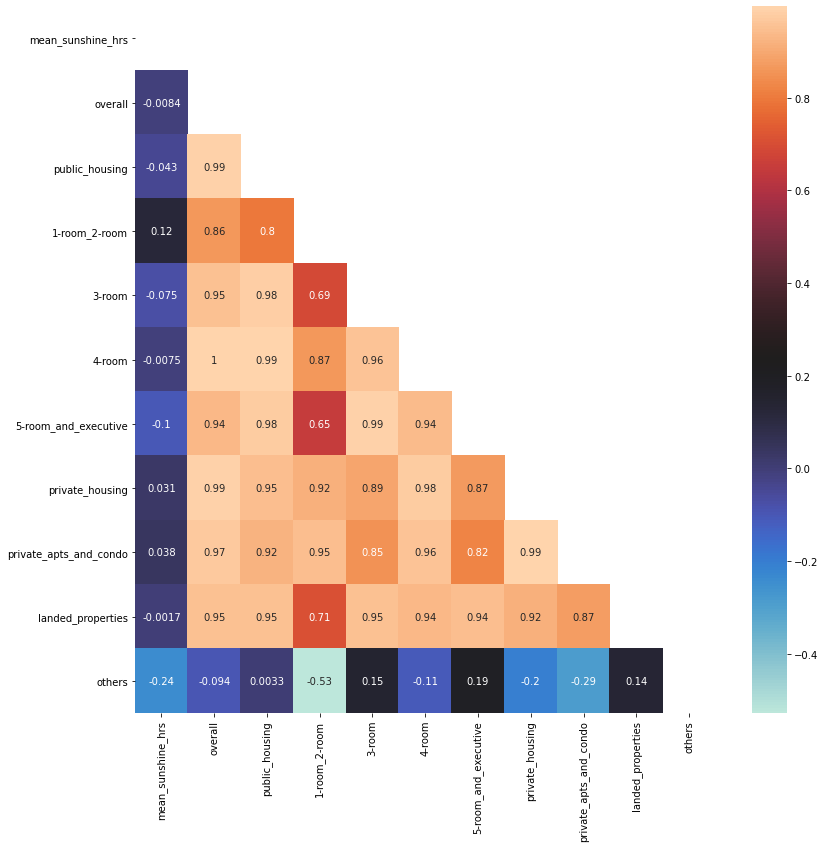

In [18]:
plt.figure(figsize=(13, 13))
sns.heatmap(energy_final.corr() , cmap='icefire',mask=np.triu(energy_final.corr()),annot=True)

In [19]:
sunshine = energy_final.corr()[['mean_sunshine_hrs']]

In [20]:
sunshine.sort_values(by='mean_sunshine_hrs')

,mean_sunshine_hrs
others,-0.241193
5-room_and_executive,-0.103731
3-room,-0.075119
public_housing,-0.042945
overall,-0.008435
4-room,-0.007537
landed_properties,-0.001735
private_housing,0.030669
private_apts_and_condo,0.038408
1-room_2-room,0.123545


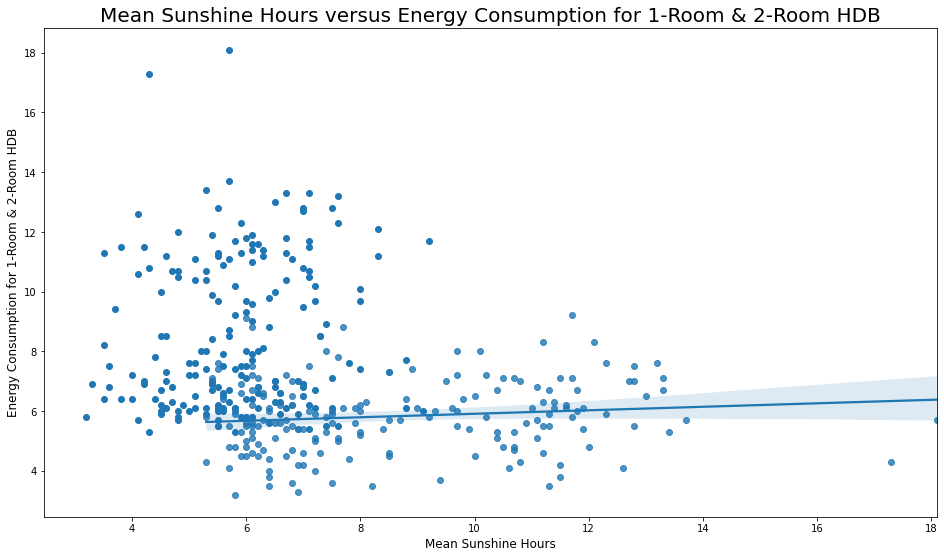

In [21]:
# Establish the size of the figure.
plt.figure(figsize=(16, 9))

# Create scatter plot of high prices versus volume.
plt.scatter(energy_final['mean_sunshine_hrs'],
            energy_final['1-room_2-room']);


sns.regplot(x="1-room_2-room", y="mean_sunshine_hrs", data=energy_final);

plt.title("Mean Sunshine Hours versus Energy Consumption for 1-Room & 2-Room HDB" , fontsize=20)
plt.ylabel("Energy Consumption for 1-Room & 2-Room HDB", fontsize = 12)
plt.xlabel("Mean Sunshine Hours", fontsize = 12);

#### Interpretation:

There is not much correlation between the mean sunshine hours to energy consumption.

Before doing the correlation plot, i was thinking Energy Consumption should have a negative correlation with Sunshine Hours, as longer the sunlight should mean residents have a shorter duration on the electrical light. However, when i plot the correlation all the data, the result is different from my expectation, as there is not much correlation from mean sunshine hours to electricity consumption.

I think that's because of the data we used, as we capture the "bright" sunshine hours for each day. "Bright" sunshine hours represent the total hours when the sunlight is stronger than a specified threshold, as opposed to just "visible" hours. "Visible" sunshine, for example, occurs around sunrise and sunset, but is not strong enough to excite the sensor. My expectation should apply only for "visible" sunshine, but not for this case.

### 4.2. Analyze different type of properties
[top](#Contents)

For energy consumption of households, it can be further seperated into different residential types:

- Public Housing
        1. 1-room_2-room
        2. 3-room
        3. 4-room
        4. 5-room_and_executive
- Private Housing
        1. private_apts_and_condo
        2. landed_properties
- others

We will look at the energy comsumpted by each residential types one-by-one.

Text(0, 0.5, 'Electricity Consumption in KWh')

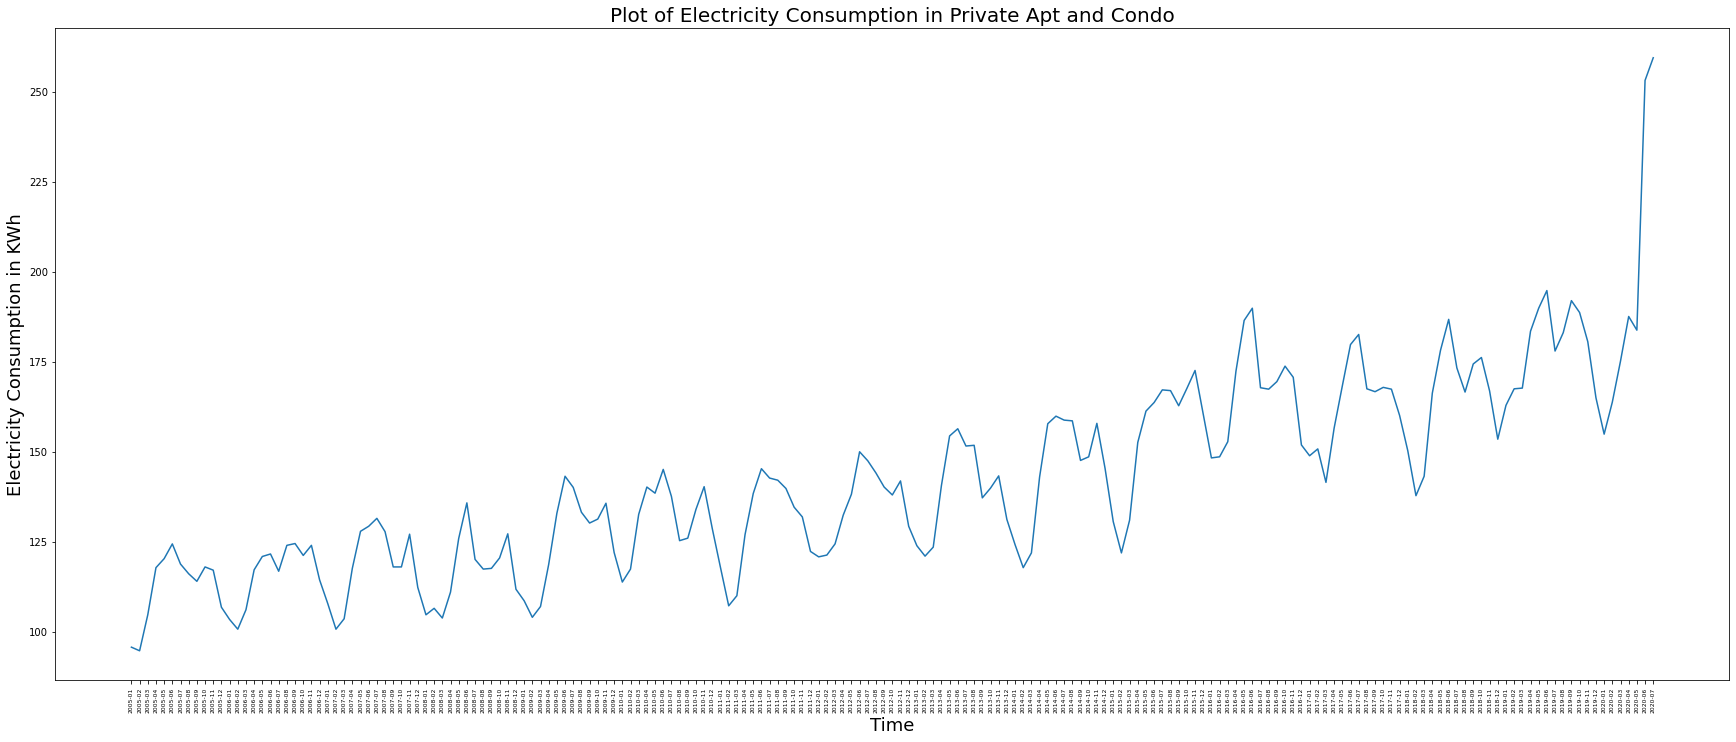

In [22]:
plt.figure(figsize=(30, 12))
plt.plot(energy_final['private_apts_and_condo'])
plt.title('Plot of Electricity Consumption in Private Apt and Condo' , fontsize=20)
plt.xlabel('Time',fontsize=18)
plt.xticks(rotation=90, fontsize=6)
plt.ylabel('Electricity Consumption in KWh',fontsize=18)

Text(0, 0.5, 'Electricity Consumption in KWh')

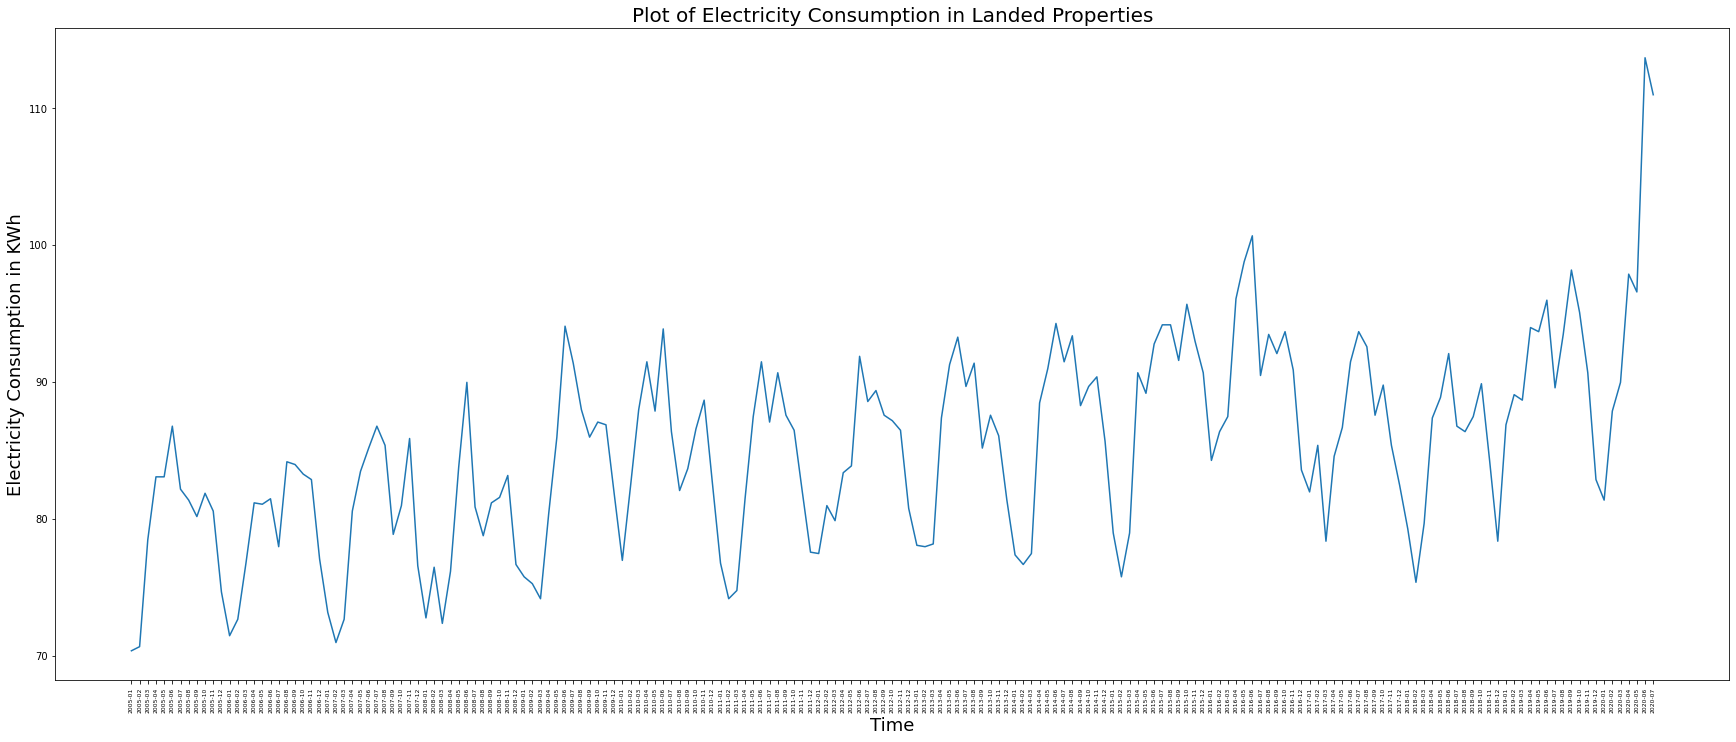

In [23]:
plt.figure(figsize=(30, 12))
plt.plot(energy_final['landed_properties'])
plt.title('Plot of Electricity Consumption in Landed Properties' , fontsize=20)
plt.xlabel('Time',fontsize=18)
plt.xticks(rotation=90, fontsize=6)
plt.ylabel('Electricity Consumption in KWh',fontsize=18)

#### Interpretation:

We see that the electricity consumption for different types of properties increase over the years.

### 4.3. Analyze changes in mean sunshine hours for different years
[top](#Contents)

Text(0, 0.5, 'Mean Sunshine Hours')

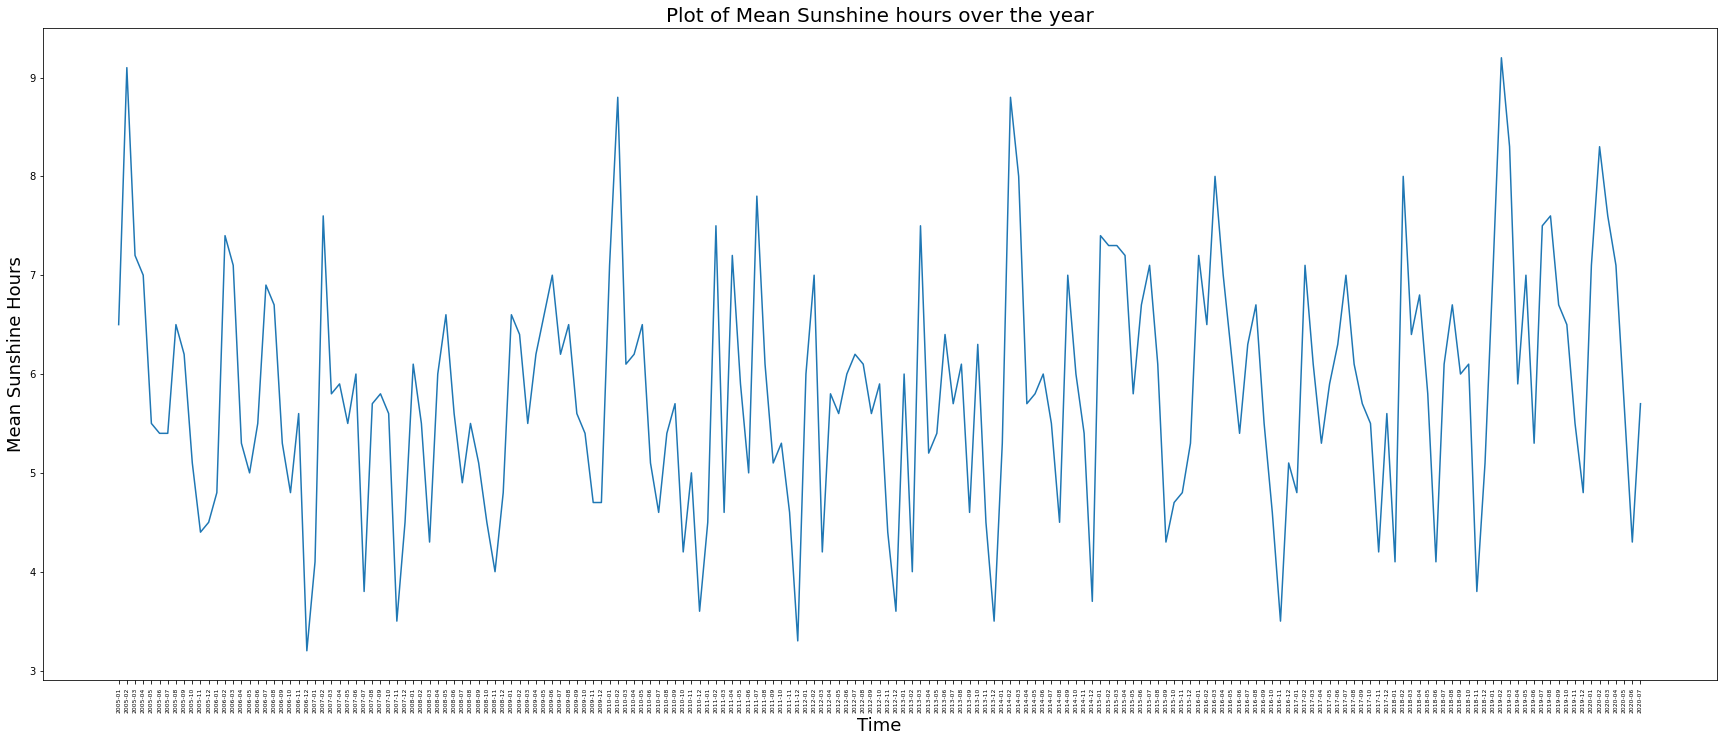

In [24]:
plt.figure(figsize=(30, 12))
plt.plot(energy_final['mean_sunshine_hrs'])
plt.title('Plot of Mean Sunshine hours over the year' , fontsize=20)
plt.xlabel('Time',fontsize=18)
plt.xticks(rotation=90, fontsize=6)
plt.ylabel('Mean Sunshine Hours',fontsize=18)

#### Interpretation:

The mean sunshine are between 3 - 9 hours, there is no significant changes in the number of hours over the year. We usually observe a longer sunshine in January, and shorter sunshine in November.

## 5. Autocorrelation
[top](#Contents)

By looking at the households electricity consumption, it seems like that the result is cyclical. We will look at 3 lags interval:
- 3 months
- 6 months
- 1 year (12 months)

#### Autocorrelation for private apartments and condo data

In [25]:
print(f'Autocorrelation between Electricity Consumption and 3-months lag Electricity Consumption: {round(energy_final["private_apts_and_condo"].autocorr(lag=3),4)}')
print(f'Autocorrelation between Electricity Consumption and 6-months lag Electricity Consumption: {round(energy_final["private_apts_and_condo"].autocorr(lag=6),4)}')
print(f'Autocorrelation between Electricity Consumption and 12-months lag Electricity Consumption: {round(energy_final["private_apts_and_condo"].autocorr(lag=12),4)}')

Autocorrelation between Electricity Consumption and 3-months lag Electricity Consumption: 0.7128
Autocorrelation between Electricity Consumption and 6-months lag Electricity Consumption: 0.6374
Autocorrelation between Electricity Consumption and 12-months lag Electricity Consumption: 0.9043


#### Autocorrelation for landed properties data

In [26]:
print(f'Autocorrelation between Electricity Consumption and 3-months lag Electricity Consumption: {round(energy_final["landed_properties"].autocorr(lag=3),4)}')
print(f'Autocorrelation between Electricity Consumption and 6-months lag Electricity Consumption: {round(energy_final["landed_properties"].autocorr(lag=6),4)}')
print(f'Autocorrelation between Electricity Consumption and 12-months lag Electricity Consumption: {round(energy_final["landed_properties"].autocorr(lag=12),4)}')

Autocorrelation between Electricity Consumption and 3-months lag Electricity Consumption: 0.2769
Autocorrelation between Electricity Consumption and 6-months lag Electricity Consumption: 0.0447
Autocorrelation between Electricity Consumption and 12-months lag Electricity Consumption: 0.7096


#### Interpretation:

By looking at the 3 lags interval we have selected: 3-months, 6-months & 12-months, the 12-months (1 year) lag of electricity consumption is strongly correlated with the current electricity consumption. This would suggest that there might be a seasonal influence working on electricity consumption separated by one year.

$$
\begin{eqnarray*}
    Y_t &=& \mu + \beta(Y_{t-12}) + \varepsilon_t \\
\end{eqnarray*}
$$

## 6. Difference the data 
[top](#Contents)

#### Difference private apartments and condo data

In [27]:
energy_final['pte_apts_condo_1stdiff'] = energy_final['private_apts_and_condo'].diff(1)
energy_final['pte_apts_condo_2nddiff'] = energy_final['private_apts_and_condo'].diff(1).diff(1)
energy_final['pte_apts_condo_3rddiff'] = energy_final['private_apts_and_condo'].diff(1).diff(1).diff(1)
energy_final['pte_apts_condo_4thdiff'] = energy_final['private_apts_and_condo'].diff(1).diff(1).diff(1).diff(1)
energy_final['pte_apts_condo_5thdiff'] = energy_final['private_apts_and_condo'].diff(1).diff(1).diff(1).diff(1).diff(1)

#### Difference landed properties data

In [28]:
energy_final['landed_1stdiff'] = energy_final['landed_properties'].diff(1)
energy_final['landed_2nddiff'] = energy_final['landed_properties'].diff(1).diff(1)
energy_final['landed_3rddiff'] = energy_final['landed_properties'].diff(1).diff(1).diff(1)
energy_final['landed_4thdiff'] = energy_final['landed_properties'].diff(1).diff(1).diff(1).diff(1)
energy_final['landed_5thdiff'] = energy_final['landed_properties'].diff(1).diff(1).diff(1).diff(1).diff(1)

## 7. Apply Dickey Fuller test for original/differenced data
[top](#Contents)

Dickey Fuller test is used to determine whether or not the data are stationary.

In [29]:
# Import Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

# Define function to easily interpret results.
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

#### Dickey Fuller test for private apartments and condo original/differenced data

In [30]:
# Execute test on no difference data.
interpret_dftest(adfuller(energy_final['private_apts_and_condo']))

Test Statistic    1.573159
p-value           0.997775
dtype: float64

In [31]:
# Execute test on 1-differenced data.
interpret_dftest(adfuller(energy_final['pte_apts_condo_1stdiff'].iloc[1:]))

Test Statistic   -3.670086
p-value           0.004554
dtype: float64

In [32]:
# Execute test on 2-differenced data.
interpret_dftest(adfuller(energy_final['pte_apts_condo_2nddiff'].iloc[2:]))

Test Statistic   -1.107799e+01
p-value           4.383250e-20
dtype: float64

#### Interpretation:

I will run the Dicker Fuller test after apply difference on the data several times. By comparing the result, it is found that 2-times differences for 1 room & 2 room is preferred.

#### Dickey Fuller test for landed properties original/differenced data

In [33]:
# Execute test on no difference data.
interpret_dftest(adfuller(energy_final['landed_properties']))

Test Statistic   -0.358864
p-value           0.916744
dtype: float64

In [34]:
# Execute test on 1-differenced data.
interpret_dftest(adfuller(energy_final['landed_1stdiff'].iloc[1:]))

Test Statistic   -4.199712
p-value           0.000660
dtype: float64

In [35]:
# Execute test on 2-differenced data.
interpret_dftest(adfuller(energy_final['landed_2nddiff'].iloc[2:]))

Test Statistic   -8.173751e+00
p-value           8.485399e-13
dtype: float64

#### Interpretation:

I will run the Dicker Fuller test after apply difference on the data several times. By comparing the result, it is found that 2-time difference for 3 room is preferred.

## 8. Train/test split for original/differenced data 
[top](#Contents)

Modeling with time series data presents unique challenges because our observations are not independent of one another. 

So, in splitting the data into `train` and `test` sets, **we cannot split randomly**. Use the first *75%* of observations as training data and the following 25% for test data (both rounded to year).

In [36]:
print(f'Number of years in the observations: {len(energy_final)/12}')
print(f'Number of years in the training observations: {round(len(energy_final)/12 * 0.75)}')
print(f'Number of years in the testing observations: {len(energy_final)/12 - round(len(energy_final)/12 * 0.75)}')

Number of years in the observations: 15.583333333333334
Number of years in the training observations: 12
Number of years in the testing observations: 3.583333333333334


Therefore, we set the first 11 years (2005 - 2015) of the observation as our train data, and last 4.5 years (Jan 2016 - Jun 2020) of our observation as our test data.

In [37]:
11 * 12

132

In [38]:
energy_final.iloc[131:133]

,mean_sunshine_hrs,overall,public_housing,1-room_2-room,3-room,4-room,5-room_and_executive,private_housing,private_apts_and_condo,landed_properties,...,pte_apts_condo_1stdiff,pte_apts_condo_2nddiff,pte_apts_condo_3rddiff,pte_apts_condo_4thdiff,pte_apts_condo_5thdiff,landed_1stdiff,landed_2nddiff,landed_3rddiff,landed_4thdiff,landed_5thdiff
month,,,,,,,,,,,,,,,,,,,,,
2015-12,5.3,622.4,370.3,10.7,66.0,151.9,141.7,251.2,160.5,90.7,...,-12.2,-17.2,-17.4,-8.6,13.2,-2.3,0.4,7.2,20.7,43.5
2016-01,7.2,570.2,336.7,10.2,61.2,137.9,127.4,232.7,148.4,84.3,...,-12.1,0.1,17.3,34.7,43.3,-6.4,-4.1,-4.5,-11.7,-32.4


In [39]:
def train_test_plot(train, test):
    plt.figure(figsize=(30, 12))
    plt.plot(train, c='blue')
    plt.plot(test, c='orange');
    plt.xlabel('Time',fontsize=18)
    plt.xticks(rotation=90, fontsize=6)
    plt.ylabel('Electricity Consumption in KWh',fontsize=18)

#### Train/Test split for private apartments and condo data

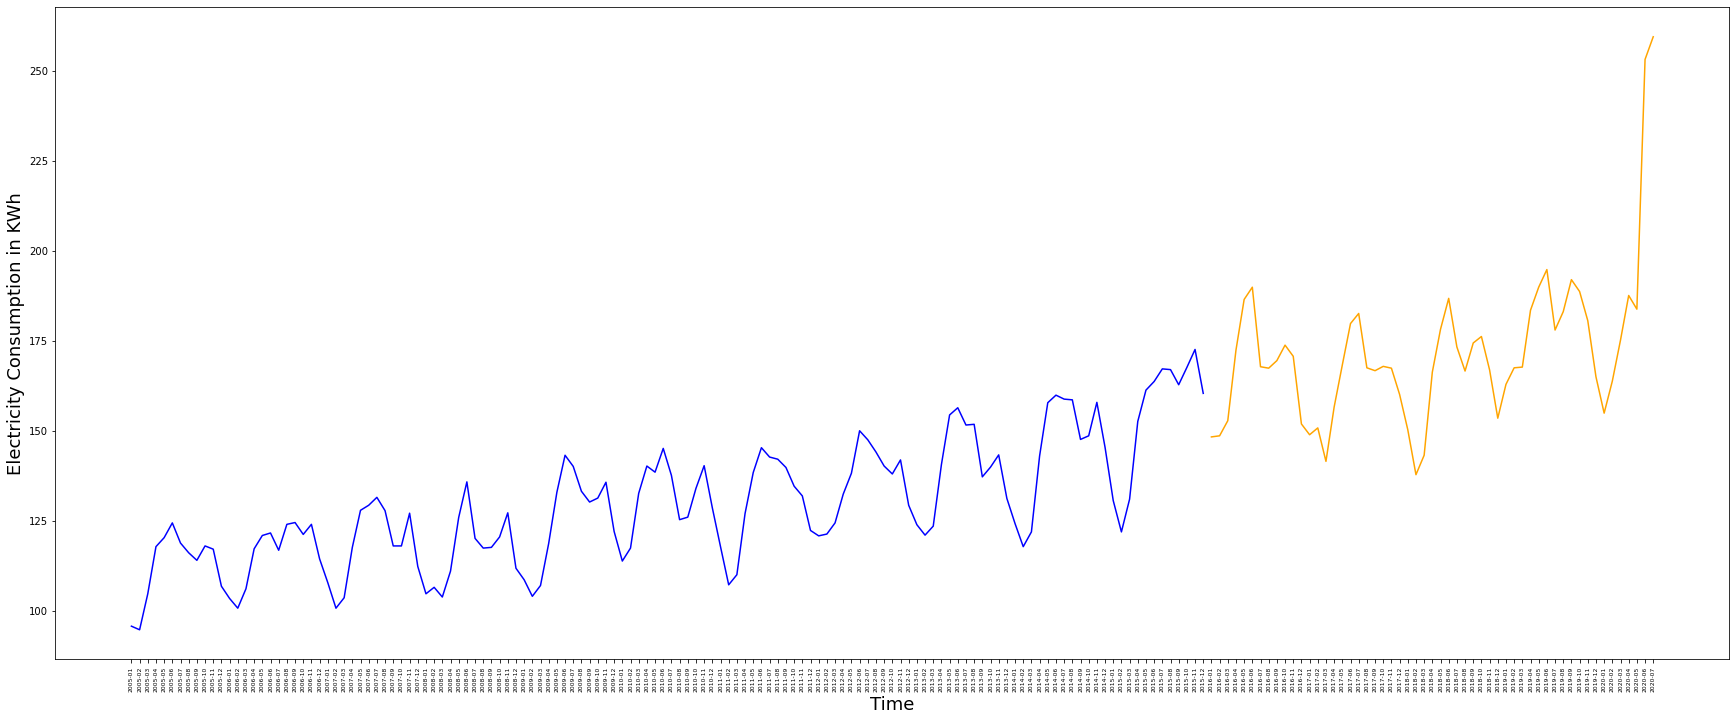

In [40]:
# Train/test split for original data

train_pte_apts_condo = energy_final['private_apts_and_condo'].iloc[:132,]
test_pte_apts_condo = energy_final['private_apts_and_condo'].iloc[132:,]

train_test_plot(train_pte_apts_condo , test_pte_apts_condo)

In [41]:
# Sanity check
train_pte_apts_condo.head()

month
2005-01     95.8
2005-02     94.8
2005-03    104.8
2005-04    117.9
2005-05    120.4
Name: private_apts_and_condo, dtype: float64

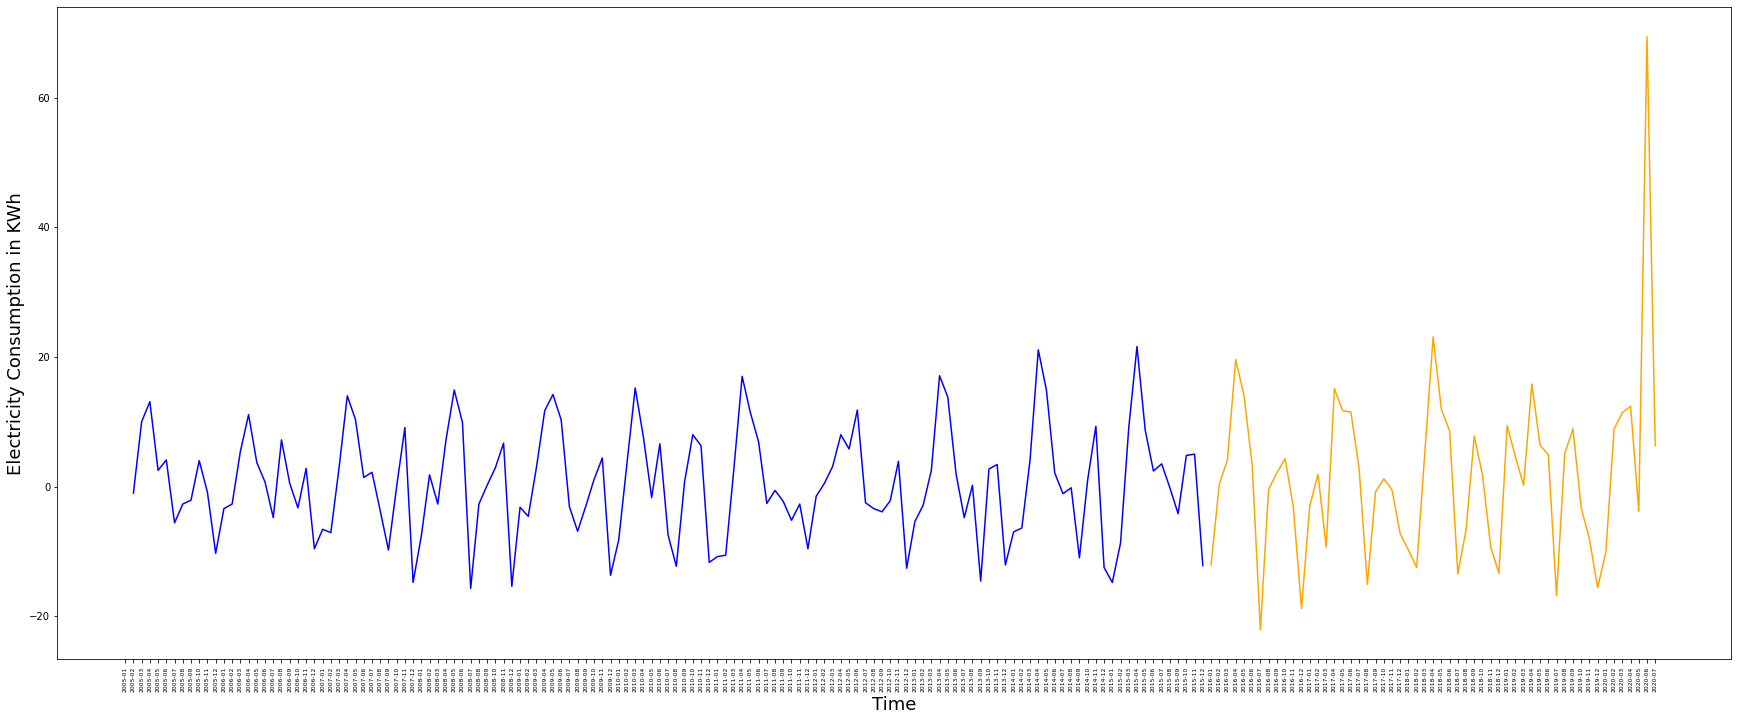

In [42]:
# Train/test split for 1st-differenced data

train_pte_apts_condo_1stdiff = energy_final['pte_apts_condo_1stdiff'].iloc[:132,]
test_pte_apts_condo_1stdiff = energy_final['pte_apts_condo_1stdiff'].iloc[132:,]

train_test_plot(train_pte_apts_condo_1stdiff , test_pte_apts_condo_1stdiff)

In [43]:
# Sanity check
train_pte_apts_condo_1stdiff.head()

month
2005-01     NaN
2005-02    -1.0
2005-03    10.0
2005-04    13.1
2005-05     2.5
Name: pte_apts_condo_1stdiff, dtype: float64

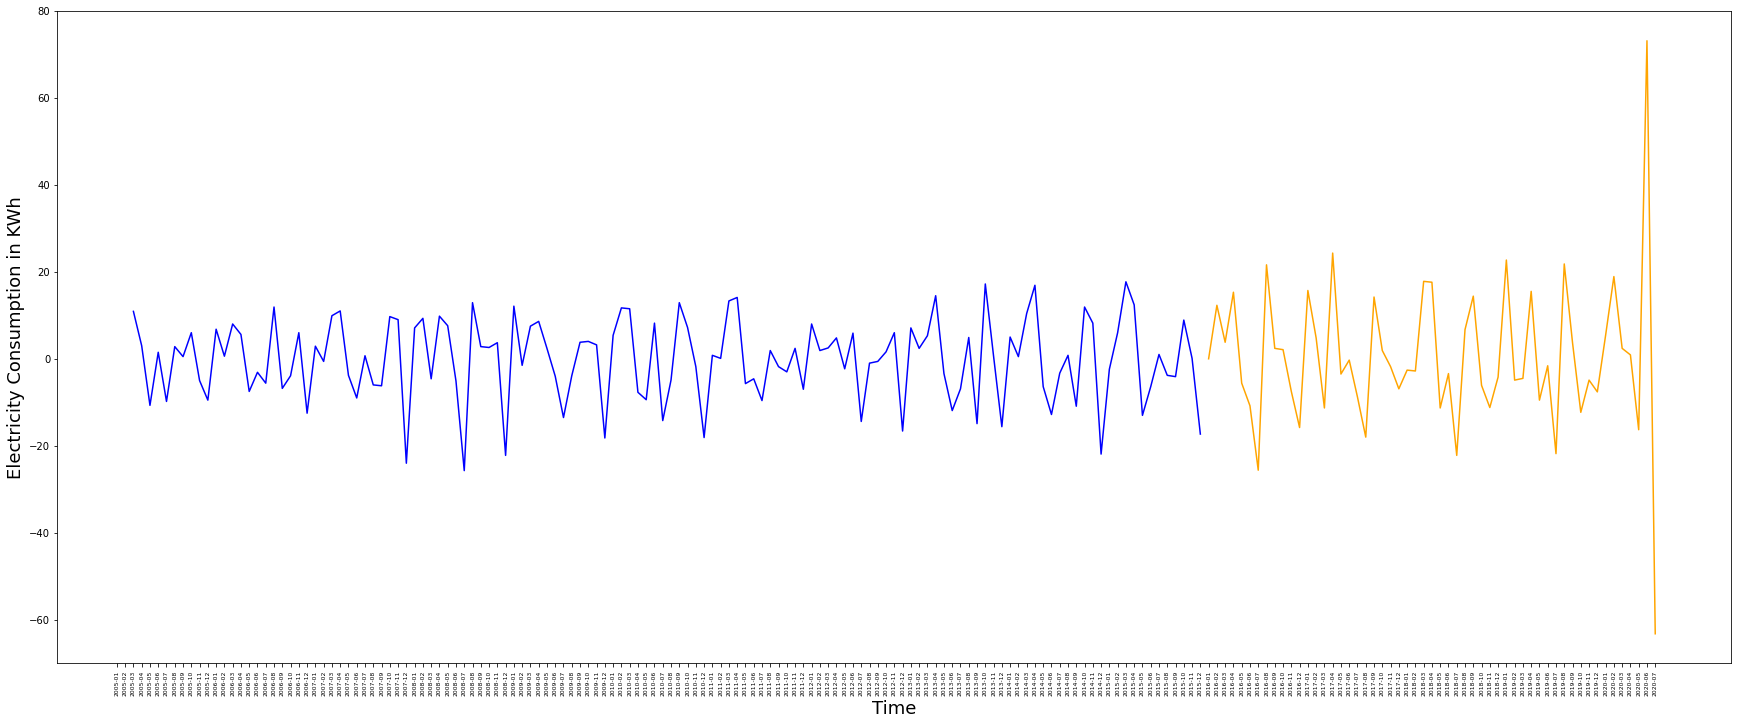

In [44]:
# Train/test split for 2nd-differenced data

train_pte_apts_condo_2nddiff = energy_final['pte_apts_condo_2nddiff'].iloc[:132,]
test_pte_apts_condo_2nddiff = energy_final['pte_apts_condo_2nddiff'].iloc[132:,]

train_test_plot(train_pte_apts_condo_2nddiff , test_pte_apts_condo_2nddiff)

In [45]:
# Sanity check
train_pte_apts_condo_2nddiff.head()

month
2005-01     NaN
2005-02     NaN
2005-03    11.0
2005-04     3.1
2005-05   -10.6
Name: pte_apts_condo_2nddiff, dtype: float64

#### Train/Test split for landed properties data

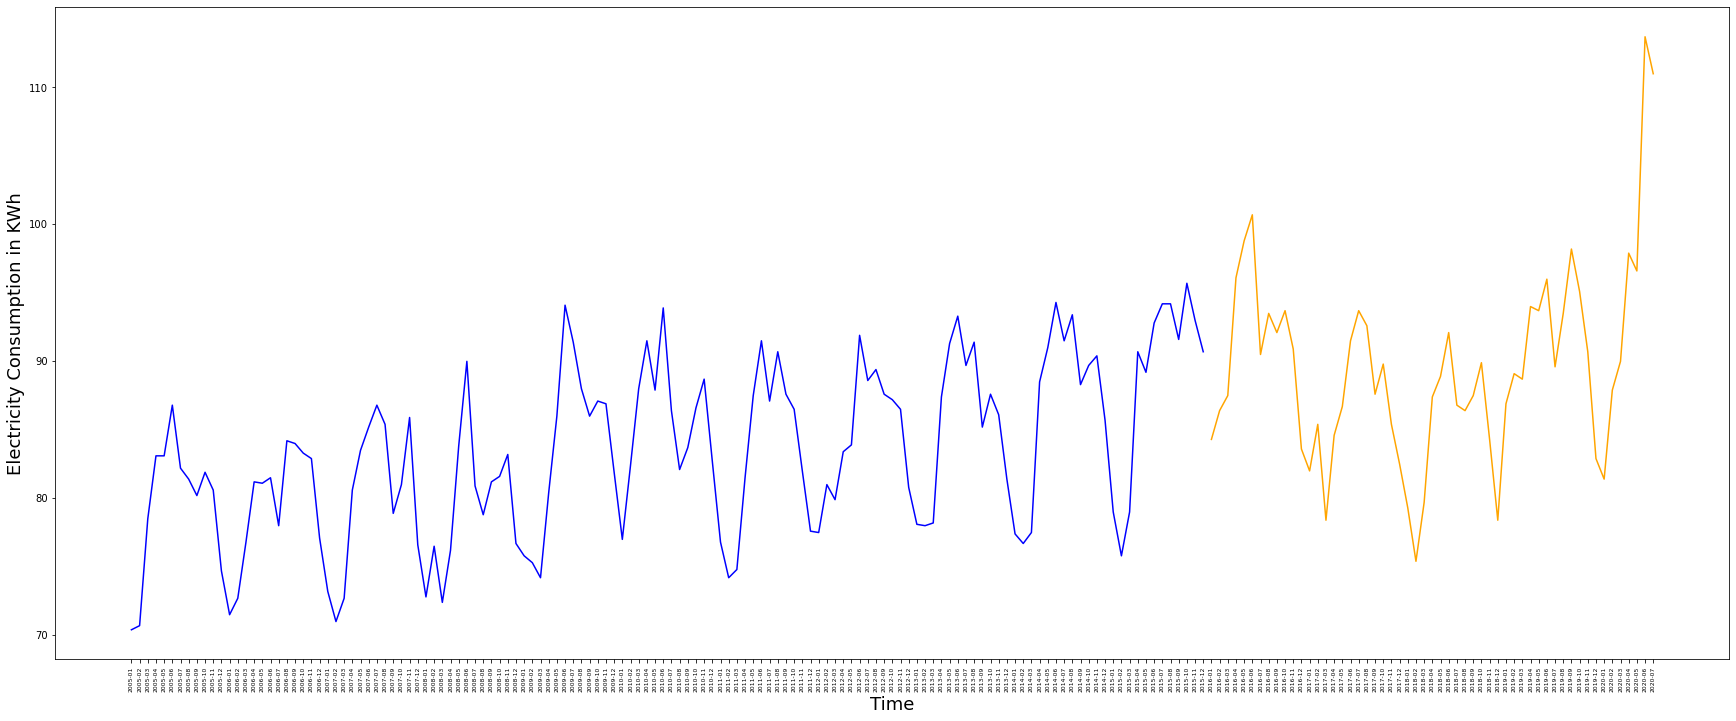

In [46]:
# Train/test split for original data

train_landed = energy_final['landed_properties'].iloc[:132,]
test_landed = energy_final['landed_properties'].iloc[132:,]

train_test_plot(train_landed , test_landed)

In [47]:
# Sanity check
train_landed.head()

month
2005-01    70.4
2005-02    70.7
2005-03    78.5
2005-04    83.1
2005-05    83.1
Name: landed_properties, dtype: float64

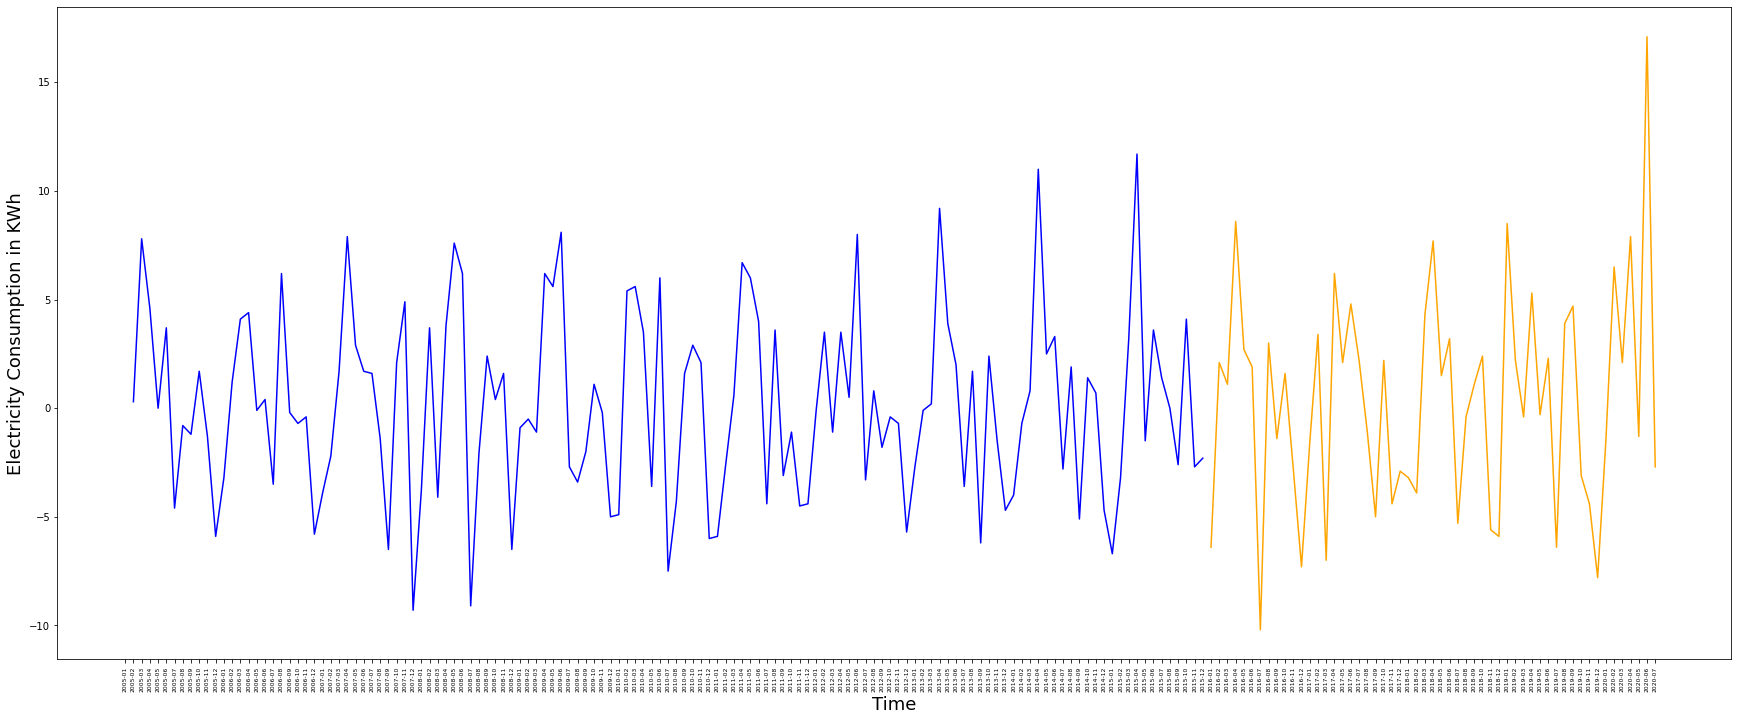

In [48]:
# Train/test split for 1st-differenced data

train_landed_1stdiff = energy_final['landed_1stdiff'].iloc[:132,]
test_landed_1stdiff = energy_final['landed_1stdiff'].iloc[132:,]

train_test_plot(train_landed_1stdiff , test_landed_1stdiff)

In [49]:
# Sanity check
train_landed_1stdiff.head()

month
2005-01    NaN
2005-02    0.3
2005-03    7.8
2005-04    4.6
2005-05    0.0
Name: landed_1stdiff, dtype: float64

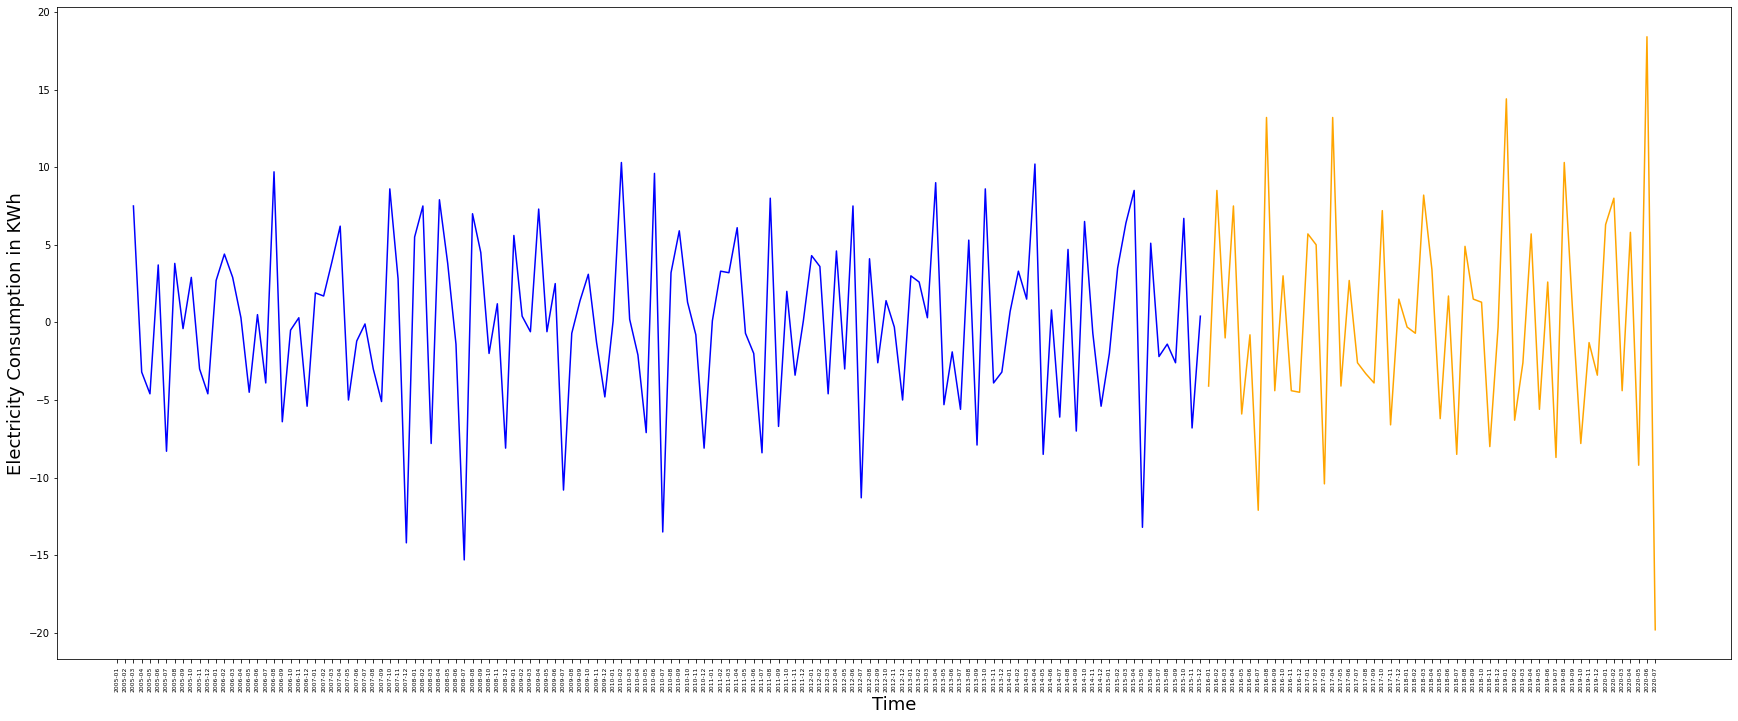

In [50]:
# Train/test split for 2nd-differenced data

train_landed_2nddiff = energy_final['landed_2nddiff'].iloc[:132,]
test_landed_2nddiff = energy_final['landed_2nddiff'].iloc[132:,]

train_test_plot(train_landed_2nddiff , test_landed_2nddiff)

In [51]:
# Sanity check
train_landed_2nddiff.head()

month
2005-01    NaN
2005-02    NaN
2005-03    7.5
2005-04   -3.2
2005-05   -4.6
Name: landed_2nddiff, dtype: float64

## 9. Plotting ACF and PACF
[top](#Contents)

From the autocorrelation result, the 12-months lag of electricity consumption is strongly correlated with the current month's electricity consumption. This would suggest that there may be seasonal influence working on electricity consumption seperated by one year.

We will plot the 12-months `ACF` and 12-months `PACF` plot now.

#### ACF & PACF for private apartments and condo data
[top](#Contents)

<Figure size 2160x864 with 0 Axes>

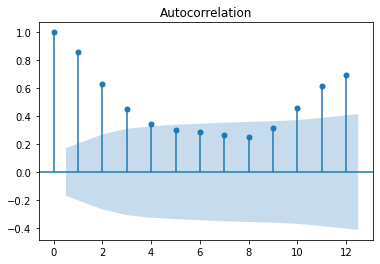

In [52]:
# Generate autocorrelation plot on training data.
plt.figure(figsize=(30, 12))
plot_acf(train_pte_apts_condo, lags = 12);

<Figure size 2160x864 with 0 Axes>

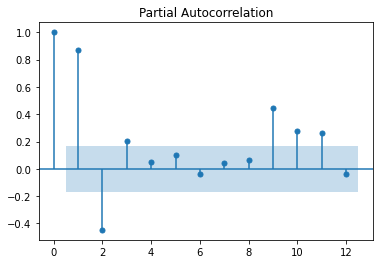

In [53]:
# Generate partial autocorrelation plot on training data.
plt.figure(figsize=(30, 12))
plot_pacf(train_pte_apts_condo, lags = 12);

#### ACF & PACF for landed properties data

<Figure size 2160x864 with 0 Axes>

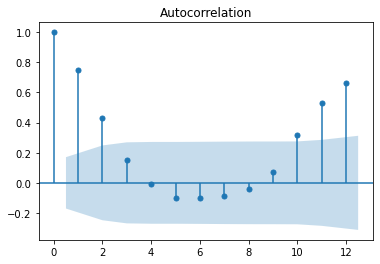

In [54]:
# Generate autocorrelation plot on training data.
plt.figure(figsize=(30, 12))
plot_acf(train_landed, lags = 12);

<Figure size 2160x864 with 0 Axes>

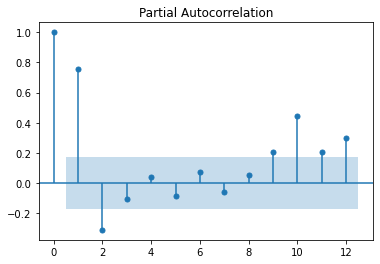

In [55]:
# Generate partial autocorrelation plot on training data.
plt.figure(figsize=(30, 12))
plot_pacf(train_landed, lags = 12);

## 10. Modeling 
[top](#Contents)

In [56]:
import warnings
warnings.simplefilter('ignore')

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

### 10.1. Modeling for private apartments and condo data
[top](#Contents)

Using for loop, i will find the most suitable value of $p$ & $q$ for the model.

In [57]:
# Starting AIC, p, and q.
best_aic = 99 * (10 ** 16)
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):
        
        # Insert try and except statements.
        try:
            
            # Fitting an ARIMA(p, 2, q) model.
            print(f'Attempting to fit ARIMA({p},2,{q})')
            
            # Instantiate ARIMA model.
            arima = ARIMA(endog = train_pte_apts_condo_2nddiff.iloc[2:],
                          order = (p,2,q)) # values of p, d, q
            
            # Fit ARIMA model.
            model = arima.fit()

            # Print out AIC for ARIMA(p, 2, q) model.
            print(f'The AIC for ARIMA({p},2,{q}) is: {model.aic}')

            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q

        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},2,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting to fit ARIMA(0,2,0)
The AIC for ARIMA(0,2,0) is: 1171.280548128187
Attempting to fit ARIMA(0,2,1)
The AIC for ARIMA(0,2,1) is: 1045.7729264392442
Attempting to fit ARIMA(0,2,2)
The AIC for ARIMA(0,2,2) is: 958.5760523719936
Attempting to fit ARIMA(0,2,3)
The AIC for ARIMA(0,2,3) is: 948.668497194367
Attempting to fit ARIMA(0,2,4)
The AIC for ARIMA(0,2,4) is: 917.503390962651
Attempting to fit ARIMA(1,2,0)
The AIC for ARIMA(1,2,0) is: 1117.5664537556513
Attempting to fit ARIMA(1,2,1)
Attempting to fit ARIMA(1,2,2)
Attempting to fit ARIMA(1,2,3)
Attempting to fit ARIMA(1,2,4)
Attempting to fit ARIMA(2,2,0)
The AIC for ARIMA(2,2,0) is: 1075.2580758284814
Attempting to fit ARIMA(2,2,1)
Attempting to fit ARIMA(2,2,2)
Attempting to fit ARIMA(2,2,3)
Attempting to fit ARIMA(2,2,4)
The AIC for ARIMA(2,2,4) is: 923.9156885160916
Attempting to fit ARIMA(3,2,0)
The AIC for ARIMA(3,2,0) is: 1068.068477929778
Attempting to fit ARIMA(3,2,1)
Attempting to fit ARIMA(3,2,2)
Attempting to fit 

In [59]:
# Instantiate an ARIMA(0,2,4) model on training data.
# Note this training data consists of the 
# time periods 0 through 132.
ar1 = ARIMA(endog = train_pte_apts_condo_2nddiff.iloc[2:],
            order = (0, 2, 4)) # (p, d, q)

# Fit ARIMA(0,2,4) model.
model = ar1.fit()

# Generate predictions based on test set.
# Start at time period 130 and end at 185.
preds1 = model.predict(start=130, end=185)

# Evaluate predictions.
mean_squared_error(test_pte_apts_condo_2nddiff, preds1.iloc[:-1])

363.89794790672073

In [60]:
# Check the data format
train_pte_apts_condo_2nddiff.iloc[2:].head()

month
2005-03    11.0
2005-04     3.1
2005-05   -10.6
2005-06     1.6
2005-07    -9.7
Name: pte_apts_condo_2nddiff, dtype: float64

In [61]:
# Check the data format
test_pte_apts_condo_2nddiff.head()

month
2016-01     0.1
2016-02    12.4
2016-03     3.9
2016-04    15.4
2016-05    -5.5
Name: pte_apts_condo_2nddiff, dtype: float64

In [62]:
# Check the data format
preds1.head()

2016-01-01    40.427661
2016-02-01   -20.733960
2016-03-01   -10.394669
2016-04-01     8.097794
2016-05-01    -0.000080
Freq: MS, dtype: float64

preds1 has days. need to remove it in-order to combine these with train/test to plot.

In [63]:
# changing datetime index into column for manipulation
preds1_clean = preds1.reset_index()
preds1_clean.head()

,index,0
0,2016-01-01,40.427661
1,2016-02-01,-20.733960
2,2016-03-01,-10.394669
3,2016-04-01,8.097794
4,2016-05-01,-0.000080


In [64]:
# applying lambda function to change format of "index" datetime column into (YYYY-MM)
preds1_clean["index"] = preds1_clean['index'].apply(lambda x:x.strftime('%Y-%m'))
preds1_clean.head()

,index,0
0,2016-01,40.427661
1,2016-02,-20.733960
2,2016-03,-10.394669
3,2016-04,8.097794
4,2016-05,-0.000080


In [65]:
# resetting the "index" from the datetime column
preds1_clean.set_index("index", inplace = True)
preds1_clean.head()

,0
index,
2016-01,40.427661
2016-02,-20.733960
2016-03,-10.394669
2016-04,8.097794
2016-05,-0.000080


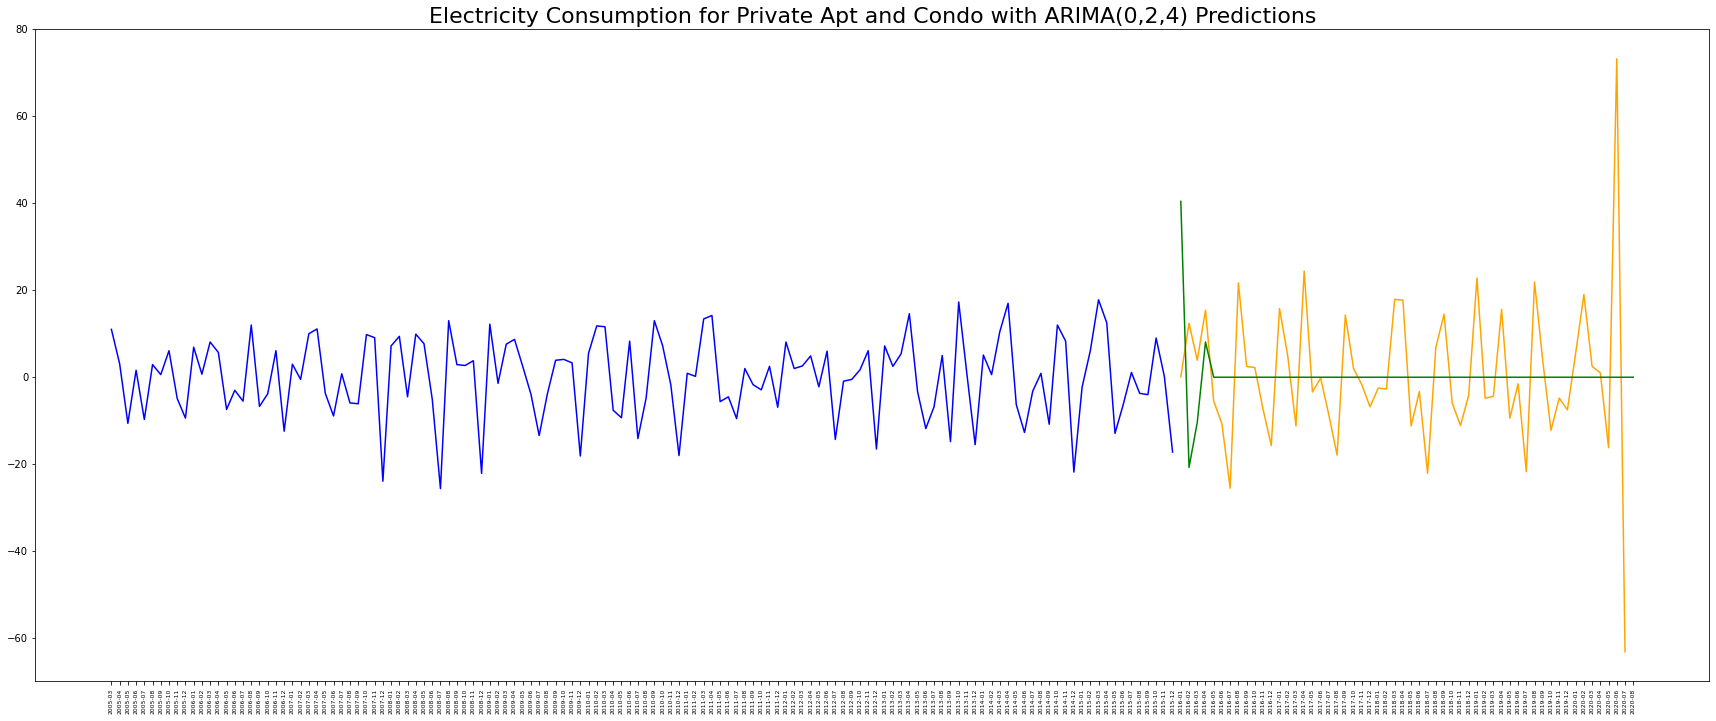

In [66]:
# Plot data.
plt.figure(figsize=(30, 12))
plt.plot(train_pte_apts_condo_2nddiff.iloc[2:], color = 'blue')
plt.plot(test_pte_apts_condo_2nddiff, color = 'orange')
plt.plot(preds1_clean, color = 'green')
plt.title(label = 'Electricity Consumption for Private Apt and Condo with ARIMA(0,2,4) Predictions', fontsize=22)
plt.xticks(rotation=90, fontsize=6)
plt.show();

ARIMA model does not give a good prediction, we will try Seasonal ARIMA (SARIMA) instead. It includes a seasonal component that will allow us to also account for seasonality that occurs over time.

In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [70]:
# Starting MSE and (P, D, Q).
mse = 99 * (10 ** 16)
final_P = 0
final_D = 0
final_Q = 0

for P in range(3):
    for Q in range(3):
        for D in range(3):
            try:
                # Instantiate SARIMA model.
                sarima = SARIMAX(endog = train_pte_apts_condo_2nddiff.iloc[2:],
                                 order = (0, 2, 4),              # (p, d, q)
                                 seasonal_order = (P, D, Q, 12)) # (P, D, Q, S)

                # Fit SARIMA model.
                model = sarima.fit()

                # Generate predictions based on test set.
                # Start at time period 130 and end at 185.
                preds1 = model.predict(start=130, end=185)                
                
                # Evaluate predictions.
                print(f'The MSE for (0, 2, 4)x({P},{D},{Q},12) is: {mean_squared_error(test_pte_apts_condo_2nddiff, preds1.iloc[:-2])}')
             
                
                # Save for final report.
                if mse > mean_squared_error(test_pte_apts_condo_2nddiff, preds1.iloc[:-2]):
                    mse = mean_squared_error(test_pte_apts_condo_2nddiff, preds1.iloc[:-2])
                    final_P = P
                    final_D = D
                    final_Q = Q
                
            except:
                pass

print(f'Our model that minimizes MSE on the training data is the SARIMA(0, 2, 4)x({final_P},{final_D},{final_Q},12).')
print(f'This model has an MSE of {mse}.')

Our model that minimizes MSE on the training data is the SARIMA(0, 2, 4)x(0,0,0,12).
This model has an MSE of 990000000000000000.


In [71]:
# Fit a SARIMA(0, 2, 4) x (0, 1, 1, 12) model.

sarima = SARIMAX(endog = train_pte_apts_condo_2nddiff.iloc[2:],
                 order = (0, 2, 4),              # (p, d, q)
                 seasonal_order = (0, 1, 1, 12)) # (P, D, Q, S)

# Fit SARIMA model.
model = sarima.fit()

# Generate predictions based on test set.
# Start at time period 130 and end at 185.
preds1 = model.predict(start=130, end=185)

# Evaluate predictions.
mean_squared_error(test_pte_apts_condo_2nddiff, preds1.iloc[:-1])

270.20931361645

In [72]:
# Check the data format
train_pte_apts_condo_2nddiff.iloc[2:].head()

month
2005-03    11.0
2005-04     3.1
2005-05   -10.6
2005-06     1.6
2005-07    -9.7
Name: pte_apts_condo_2nddiff, dtype: float64

In [73]:
# Check the data format
test_pte_apts_condo_2nddiff.head()

month
2016-01     0.1
2016-02    12.4
2016-03     3.9
2016-04    15.4
2016-05    -5.5
Name: pte_apts_condo_2nddiff, dtype: float64

In [74]:
# Check the data format
preds1.head()

2016-01-01    6.225621
2016-02-01    3.521720
2016-03-01    8.608928
2016-04-01    8.664789
2016-05-01   -4.546010
Freq: MS, Name: predicted_mean, dtype: float64

preds1 has days. need to remove it in-order to combine these with train/test to plot.

In [75]:
# changing datetime index into column for manipulation
preds1_clean = preds1.reset_index()
preds1_clean.head()

,index,predicted_mean
0,2016-01-01,6.225621
1,2016-02-01,3.521720
2,2016-03-01,8.608928
3,2016-04-01,8.664789
4,2016-05-01,-4.546010


In [76]:
# applying lambda function to change format of "index" datetime column into (YYYY-MM)
preds1_clean["index"] = preds1_clean['index'].apply(lambda x:x.strftime('%Y-%m'))
preds1_clean.head()

,index,predicted_mean
0,2016-01,6.225621
1,2016-02,3.521720
2,2016-03,8.608928
3,2016-04,8.664789
4,2016-05,-4.546010


In [77]:
# resetting the "index" from the datetime column
preds1_clean.set_index("index", inplace = True)
preds1_clean.head()

,predicted_mean
index,
2016-01,6.225621
2016-02,3.521720
2016-03,8.608928
2016-04,8.664789
2016-05,-4.546010


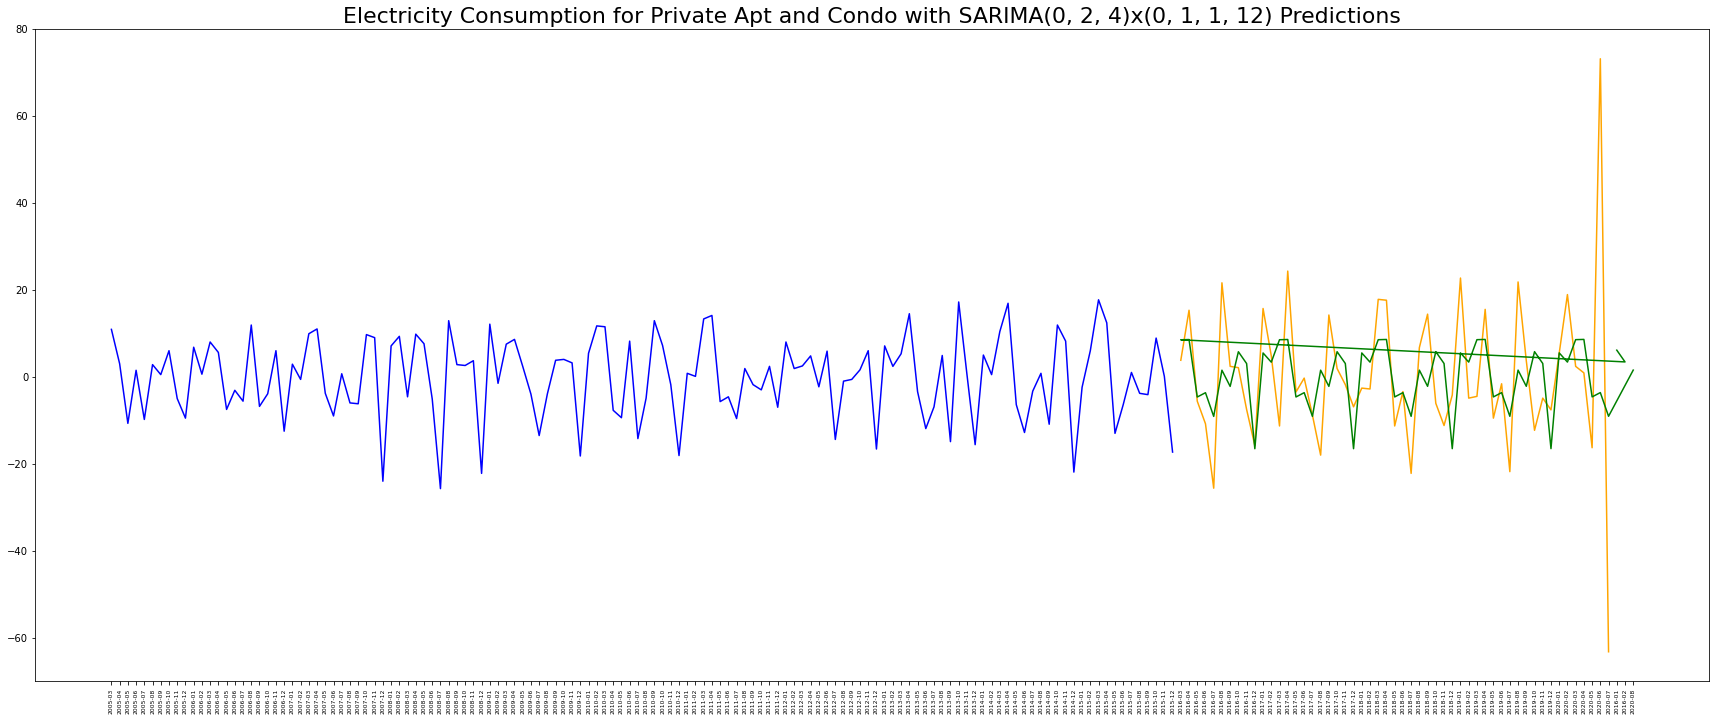

In [78]:
# Plot data.
plt.figure(figsize=(30, 12))
plt.plot(train_pte_apts_condo_2nddiff.iloc[2:], color = 'blue')
plt.plot(test_pte_apts_condo_2nddiff.iloc[2:], color = 'orange')
plt.plot(preds1_clean, color = 'green')
plt.title(label = 'Electricity Consumption for Private Apt and Condo with SARIMA(0, 2, 4)x(0, 1, 1, 12) Predictions', fontsize=22)
plt.xticks(rotation=90, fontsize=6)
plt.show();

#### Interpretation:

Our model gives a less variance of the electricity consumption of Private Apartments and Condo. Also, the model does not give a good prediction because of the recent surge in the electricity consumption. Other than that, i feel that it gives quite a good predicition of the actual result.

### 10.2. Modeling for landed properties data
[top](#Contents)

Using for loop, i will find the most suitable value of $p$ & $q$ for the model.

In [79]:
# Starting AIC, p, and q.
best_aic = 99 * (10 ** 16)
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):
        
        # Insert try and except statements.
        try:
            
            # Fitting an ARIMA(p, 2, q) model.
            print(f'Attempting to fit ARIMA({p},2,{q})')
            
            # Instantiate ARIMA model.
            arima = ARIMA(endog = train_landed_2nddiff.iloc[2:],
                          order = (p,2,q)) # values of p, d, q
            
            # Fit ARIMA model.
            model = arima.fit()

            # Print out AIC for ARIMA(p, 2, q) model.
            print(f'The AIC for ARIMA({p},2,{q}) is: {model.aic}')

            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q

        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},2,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting to fit ARIMA(0,2,0)
The AIC for ARIMA(0,2,0) is: 1087.810784311759
Attempting to fit ARIMA(0,2,1)
The AIC for ARIMA(0,2,1) is: 944.047954606559
Attempting to fit ARIMA(0,2,2)
The AIC for ARIMA(0,2,2) is: 825.8145432510346
Attempting to fit ARIMA(0,2,3)
The AIC for ARIMA(0,2,3) is: 781.9164509754415
Attempting to fit ARIMA(0,2,4)
The AIC for ARIMA(0,2,4) is: 779.0478206054813
Attempting to fit ARIMA(1,2,0)
The AIC for ARIMA(1,2,0) is: 984.5399475986177
Attempting to fit ARIMA(1,2,1)
Attempting to fit ARIMA(1,2,2)
Attempting to fit ARIMA(1,2,3)
Attempting to fit ARIMA(1,2,4)
Attempting to fit ARIMA(2,2,0)
The AIC for ARIMA(2,2,0) is: 950.7895771082609
Attempting to fit ARIMA(2,2,1)
The AIC for ARIMA(2,2,1) is: 865.9643409655296
Attempting to fit ARIMA(2,2,2)
Attempting to fit ARIMA(2,2,3)
Attempting to fit ARIMA(2,2,4)
Attempting to fit ARIMA(3,2,0)
The AIC for ARIMA(3,2,0) is: 919.5608673074272
Attempting to fit ARIMA(3,2,1)
The AIC for ARIMA(3,2,1) is: 849.0514108552812
Atte

In [80]:
# Instantiate an ARIMA(0,2,4) model on training data.
# Note this training data consists of the 
# time periods 0 through 132.
ar2 = ARIMA(endog = train_landed_2nddiff.iloc[2:],
            order = (0, 2, 4)) # (p, d, q)

# Fit ARIMA(0,2,4) model.
model = ar2.fit()

# Generate predictions based on test set.
# Start at time period 130 and end at 185.
preds2 = model.predict(start=130, end=185)

# Evaluate predictions.
mean_squared_error(test_landed_2nddiff, preds2.iloc[:-1])

53.75935832505568

In [81]:
# Check the data format
train_landed_2nddiff.iloc[2:].head()

month
2005-03    7.5
2005-04   -3.2
2005-05   -4.6
2005-06    3.7
2005-07   -8.3
Name: landed_2nddiff, dtype: float64

In [82]:
# Check the data format
test_landed_2nddiff.head()

month
2016-01   -4.1
2016-02    8.5
2016-03   -1.0
2016-04    7.5
2016-05   -5.9
Name: landed_2nddiff, dtype: float64

In [83]:
# Check the data format
preds2.head()

2016-01-01   -5.953140
2016-02-01   -3.289129
2016-03-01    1.464617
2016-04-01    0.299772
2016-05-01   -0.000027
Freq: MS, dtype: float64

preds2 has days. need to remove it in-order to combine these with train/test to plot.

In [84]:
# changing datetime index into column for manipulation
preds2_clean = preds2.reset_index()
preds2_clean.head()

,index,0
0,2016-01-01,-5.953140
1,2016-02-01,-3.289129
2,2016-03-01,1.464617
3,2016-04-01,0.299772
4,2016-05-01,-0.000027


In [85]:
# applying lambda function to change format of "index" datetime column into (YYYY-MM)
preds2_clean["index"] = preds2_clean['index'].apply(lambda x:x.strftime('%Y-%m'))
preds2_clean.head()

,index,0
0,2016-01,-5.953140
1,2016-02,-3.289129
2,2016-03,1.464617
3,2016-04,0.299772
4,2016-05,-0.000027


In [86]:
# resetting the "index" from the datetime column
preds2_clean.set_index("index", inplace = True)
preds2_clean.head()

,0
index,
2016-01,-5.953140
2016-02,-3.289129
2016-03,1.464617
2016-04,0.299772
2016-05,-0.000027


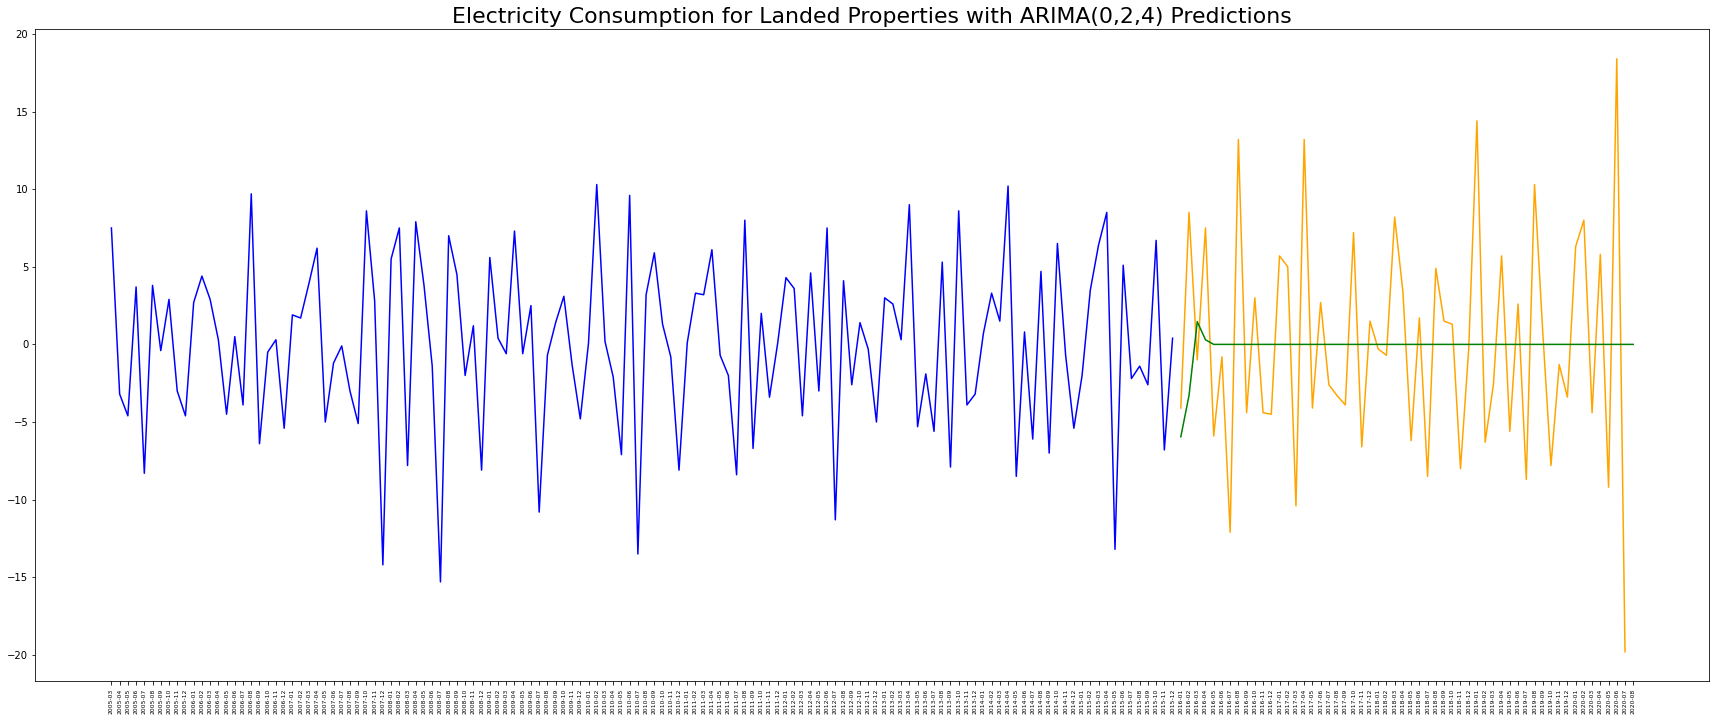

In [87]:
# Plot data.
plt.figure(figsize=(30, 12))
plt.plot(train_landed_2nddiff.iloc[2:], color = 'blue')
plt.plot(test_landed_2nddiff, color = 'orange')
plt.plot(preds2_clean, color = 'green')
plt.title(label = 'Electricity Consumption for Landed Properties with ARIMA(0,2,4) Predictions', fontsize=22)
plt.xticks(rotation=90, fontsize=6)
plt.show();

ARIMA model does not give a good prediction, we will try Seasonal ARIMA (SARIMA) instead. It includes a seasonal component that will allow us to also account for seasonality that occurs over time.

In [89]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [90]:
# Starting MSE and (P, D, Q).
mse = 99 * (10 ** 16)
final_P = 0
final_D = 0
final_Q = 0

for P in range(3):
    for Q in range(3):
        for D in range(3):
            try:
                # Instantiate SARIMA model.
                sarima = SARIMAX(endog = train_landed_2nddiff.iloc[2:],
                                 order = (0, 2, 4),              # (p, d, q)
                                 seasonal_order = (P, D, Q, 12)) # (P, D, Q, S)

                # Fit SARIMA model.
                model = sarima.fit()

                # Generate predictions based on test set.
                # Start at time period 130 and end at 185.
                preds2 = model.predict(start=130, end=185)                
                
                # Evaluate predictions.
                print(f'The MSE for (0, 2, 4)x({P},{D},{Q},12) is: {mean_squared_error(test_landed_2nddiff, preds2.iloc[:-2])}')
             
                
                # Save for final report.
                if mse > mean_squared_error(test_landed_2nddiff, preds2.iloc[:-2]):
                    mse = mean_squared_error(test_landed_2nddiff, preds2.iloc[:-2])
                    final_P = P
                    final_D = D
                    final_Q = Q
                
            except:
                pass

print(f'Our model that minimizes MSE on the training data is the SARIMA(0, 2, 4)x({final_P},{final_D},{final_Q},12).')
print(f'This model has an MSE of {mse}.')

Our model that minimizes MSE on the training data is the SARIMA(0, 2, 4)x(0,0,0,12).
This model has an MSE of 990000000000000000.


In [91]:
# Fit a SARIMA(0, 2, 4) x (0, 1, 1, 12) model.

sarima = SARIMAX(endog = train_landed_2nddiff.iloc[2:],
                 order = (0, 2, 4),              # (p, d, q)
                 seasonal_order = (0, 1, 1, 12)) # (P, D, Q, S)

# Fit SARIMA model.
model = sarima.fit()

# Generate predictions based on test set.
# Start at time period 130 and end at 185.
preds2 = model.predict(start=130, end=185)

# Evaluate predictions.
mean_squared_error(test_landed_2nddiff, preds2.iloc[:-1])

30.871817303740702

In [92]:
# Check the data format
train_landed_2nddiff.iloc[2:].head()

month
2005-03    7.5
2005-04   -3.2
2005-05   -4.6
2005-06    3.7
2005-07   -8.3
Name: landed_2nddiff, dtype: float64

In [93]:
# Check the data format
test_landed_2nddiff.head()

month
2016-01   -4.1
2016-02    8.5
2016-03   -1.0
2016-04    7.5
2016-05   -5.9
Name: landed_2nddiff, dtype: float64

In [94]:
# Check the data format
preds2.head()

2016-01-01   -1.091180
2016-02-01    3.781442
2016-03-01    1.461691
2016-04-01    6.196992
2016-05-01   -5.712604
Freq: MS, Name: predicted_mean, dtype: float64

preds2 has days. need to remove it in-order to combine these with train/test to plot.

In [95]:
# changing datetime index into column for manipulation
preds2_clean = preds2.reset_index()
preds2_clean.head()

,index,predicted_mean
0,2016-01-01,-1.091180
1,2016-02-01,3.781442
2,2016-03-01,1.461691
3,2016-04-01,6.196992
4,2016-05-01,-5.712604


In [96]:
# applying lambda function to change format of "index" datetime column into (YYYY-MM)
preds2_clean["index"] = preds2_clean['index'].apply(lambda x:x.strftime('%Y-%m'))
preds2_clean.head()

,index,predicted_mean
0,2016-01,-1.091180
1,2016-02,3.781442
2,2016-03,1.461691
3,2016-04,6.196992
4,2016-05,-5.712604


In [97]:
# resetting the "index" from the datetime column
preds2_clean.set_index("index", inplace = True)
preds2_clean.head()

,predicted_mean
index,
2016-01,-1.091180
2016-02,3.781442
2016-03,1.461691
2016-04,6.196992
2016-05,-5.712604


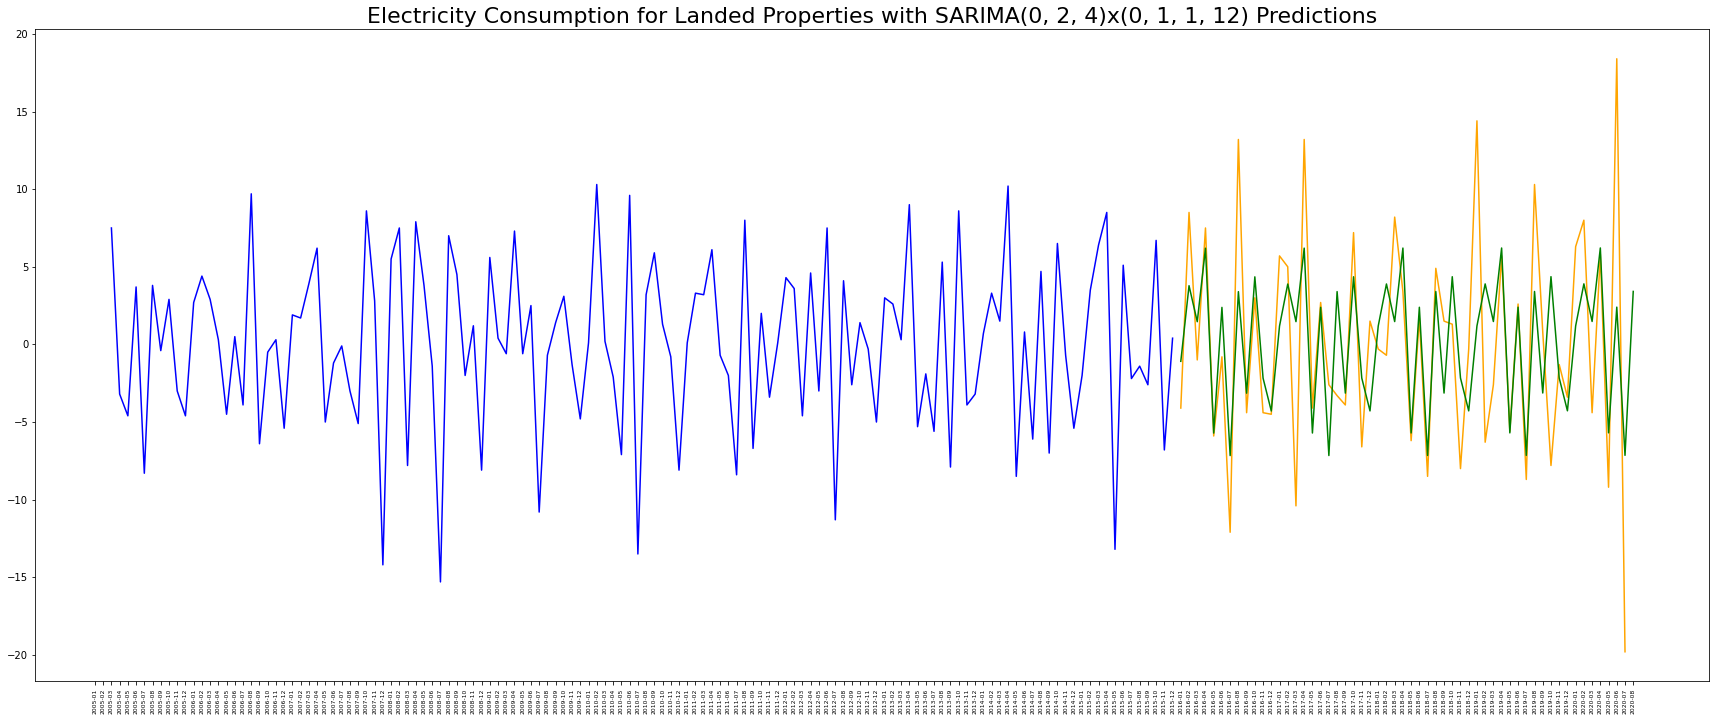

In [98]:
# Plot data.
plt.figure(figsize=(30, 12))
plt.plot(train_landed_2nddiff, color = 'blue')
plt.plot(test_landed_2nddiff, color = 'orange')
plt.plot(preds2_clean, color = 'green')
plt.title(label = 'Electricity Consumption for Landed Properties with SARIMA(0, 2, 4)x(0, 1, 1, 12) Predictions', fontsize=22)
plt.xticks(rotation=90, fontsize=6)
plt.show();

#### Interpretation:

Our model gives a less variance of the electricity consumption of Landed Properties household. Also, the model does not give a good prediction because of the recent surge in the electricity consumption. Other than that, i feel that it gives quite a good predicition of the actual result.

## 11. Conclusion 
[top](#Contents)

As Singapore enters phase 3 of circuit-breaker, a lot of people still Work from Home and the Home-Based Learning.

We foresee the rate of household electricity consumption of 2021 is higher than usual, and it is quite difficult to predict the actual rate because of the usage pattern is different from past years. 

## 12. References
[top](#Contents)

[1] Sunshine duration. https://en.wikipedia.org/wiki/Sunshine_duration

[2] List of cities by sunshine duration https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration